# Iris Flower Classification Project
## Introduction to AI - Final Project

**Project Goal:** Predict iris flower species (Setosa, Versicolor, Virginica) based on sepal and petal measurements using both classical machine learning and neural network approaches.

**Dataset:** IRIS.csv

**Features:**
- Sepal Length (cm)
- Sepal Width (cm)
- Petal Length (cm)
- Petal Width (cm)

**Target:** Species (Iris-setosa, Iris-versicolor, Iris-virginica)


## 1. Data Analysis, Description and Understanding, Data Visualization

### 1.1 Importing Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline


### 1.2 Loading and Exploring the Dataset


In [2]:
# Load the dataset
df = pd.read_csv('IRIS.csv')

# Display first few rows
print("First 10 rows of the dataset:")
print(df.head(10))
print("\n" + "="*50 + "\n")

# Dataset information
print("Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n" + "="*50 + "\n")

# Column information
print("Column Names and Data Types:")
print(df.info())
print("\n" + "="*50 + "\n")

# Statistical summary
print("Statistical Summary:")
print(df.describe())
print("\n" + "="*50 + "\n")

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Species distribution
print("Species Distribution:")
print(df['species'].value_counts())


First 10 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


Dataset Shape:
Rows: 150, Columns: 5


Column Names and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dt

**Açıklama (TR):** Veri setini yükledik ve temel bilgileri inceledik. Her sütunun ne ifade ettiğini görelim:
- **sepal_length**: Çanak yaprağı uzunluğu (cm)
- **sepal_width**: Çanak yaprağı genişliği (cm)
- **petal_length**: Taç yaprağı uzunluğu (cm)
- **petal_width**: Taç yaprağı genişliği (cm)
- **species**: Çiçek türü (hedef değişken) - Iris-setosa, Iris-versicolor, Iris-virginica

Veri setinde 150 örnek var ve her türden 50'şer örnek bulunuyor (balanced dataset).

**Explanation (EN):** We loaded the dataset and examined the basic information. Let's see what each column represents:
- **sepal_length**: Sepal length in cm
- **sepal_width**: Sepal width in cm
- **petal_length**: Petal length in cm
- **petal_width**: Petal width in cm
- **species**: Flower species (target variable) - Iris-setosa, Iris-versicolor, Iris-virginica

The dataset contains 150 samples with 50 samples from each species (balanced dataset).


### 1.3 Data Visualization


#### 1.3.1 Histogram - Feature Distributions


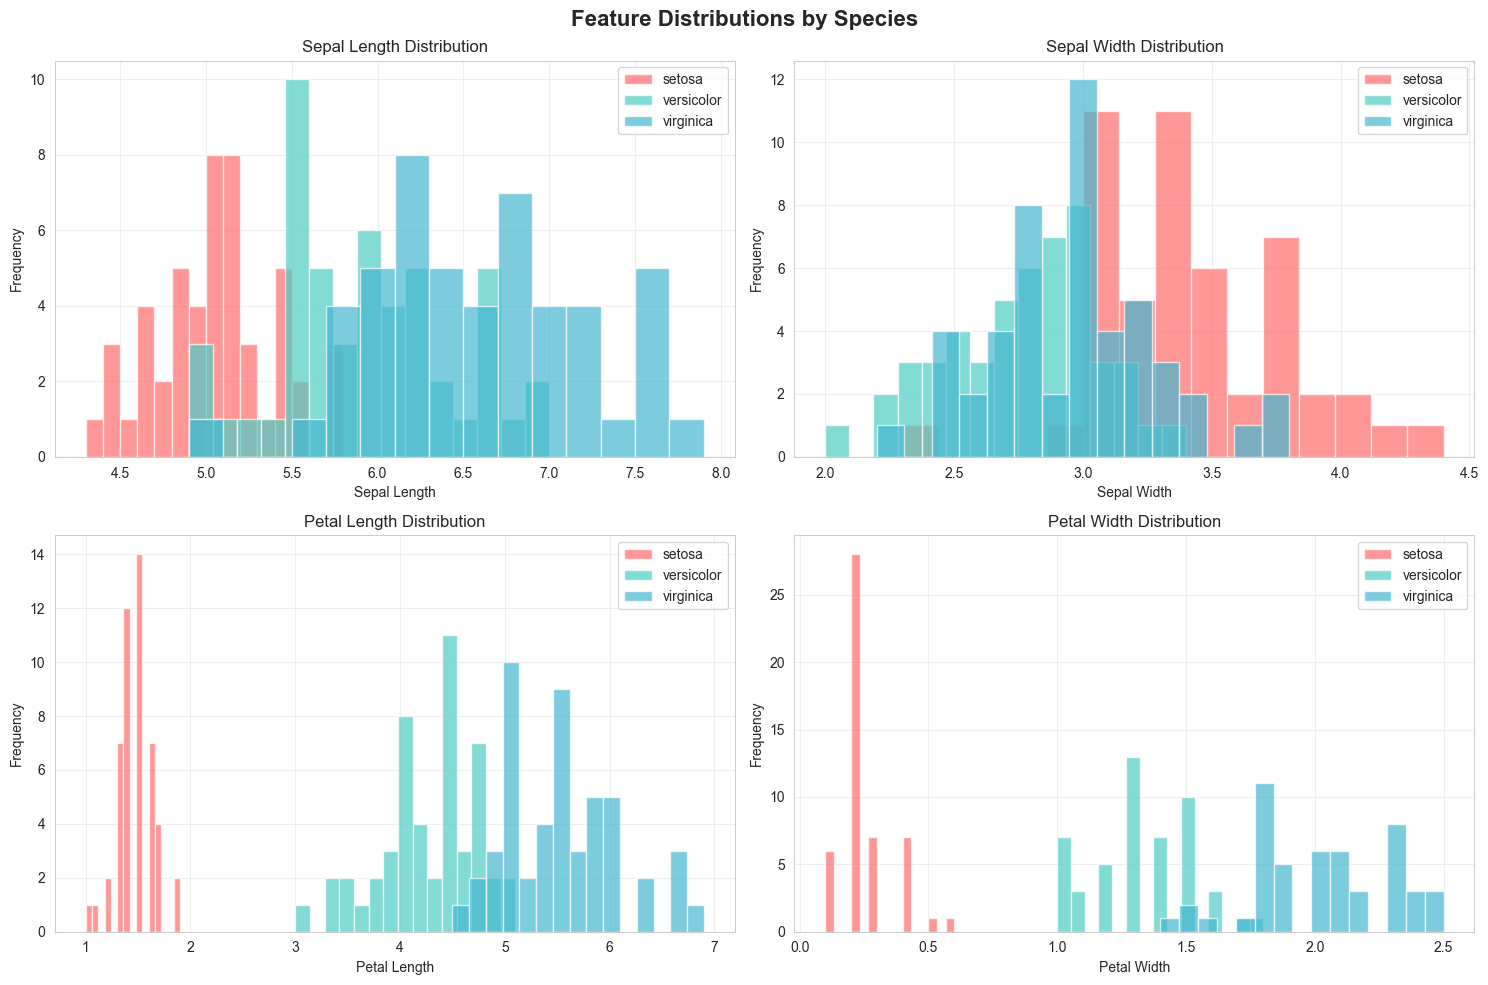

In [3]:
# Histogram for each feature by species
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Feature Distributions by Species', fontsize=16, fontweight='bold')

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
species_list = df['species'].unique()

for idx, feature in enumerate(features):
    ax = axes[idx // 2, idx % 2]
    for i, species in enumerate(species_list):
        data = df[df['species'] == species][feature]
        ax.hist(data, alpha=0.7, label=species.split('-')[1], color=colors[i], bins=15)
    ax.set_xlabel(feature.replace('_', ' ').title())
    ax.set_ylabel('Frequency')
    ax.set_title(f'{feature.replace("_", " ").title()} Distribution')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Açıklama (TR):** Histogramlar, her özelliğin türlere göre dağılımını gösteriyor. Petal length ve petal width özelliklerinin türleri ayırt etmede daha etkili olduğunu görebiliriz.

**Explanation (EN):** Histograms show the distribution of each feature by species. We can see that petal length and petal width features are more effective in distinguishing between species.


#### 1.3.2 Pairplot - Feature Relationships


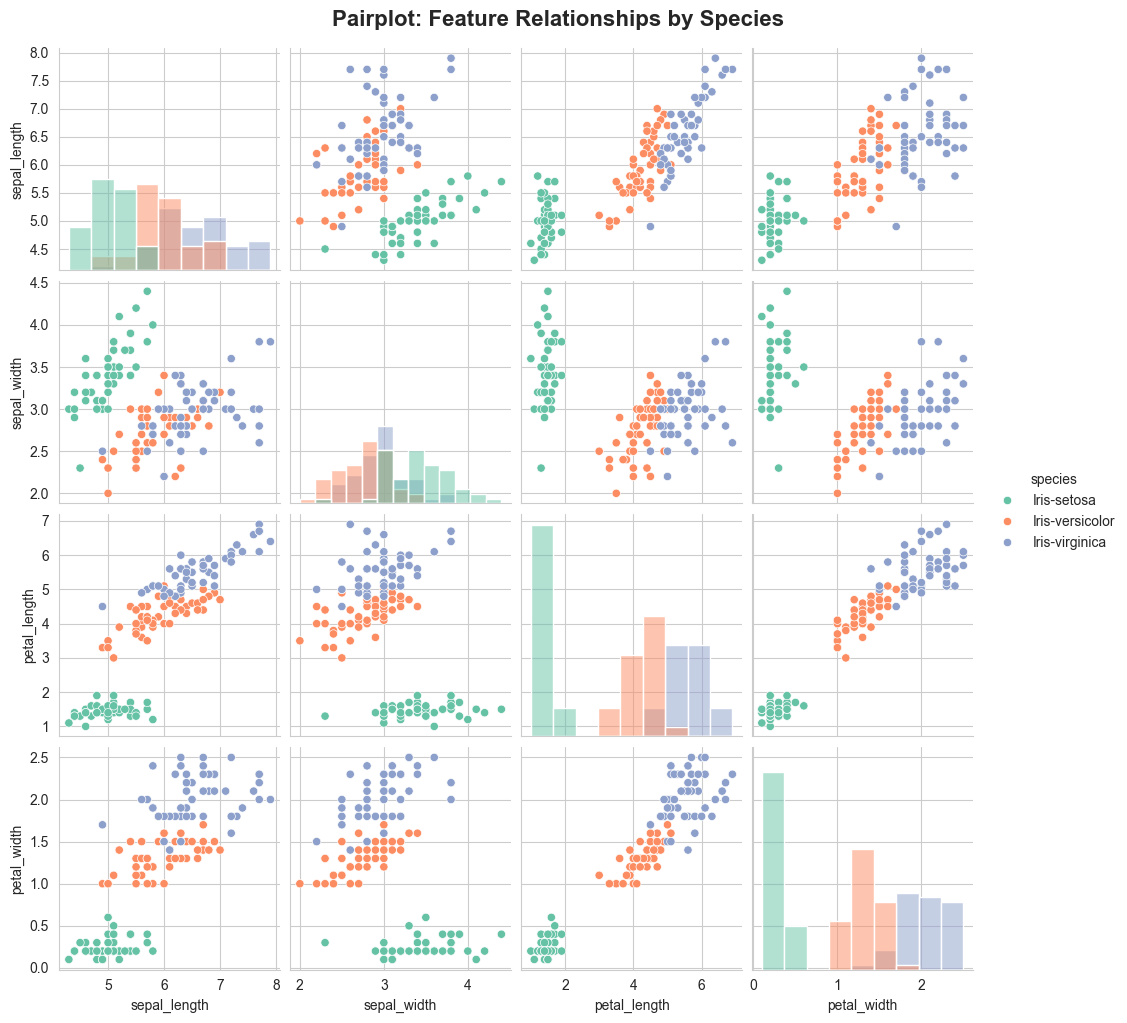

In [4]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species', diag_kind='hist', palette='Set2', height=2.5)
plt.suptitle('Pairplot: Feature Relationships by Species', y=1.02, fontsize=16, fontweight='bold')
plt.show()


**Açıklama (TR):** Pairplot, tüm özellikler arasındaki ilişkileri ve türlerin birbirine yakınlığını gösteriyor. Iris-setosa diğer iki türden net bir şekilde ayrılıyor. Iris-versicolor ve Iris-virginica arasında bazı örtüşmeler var.

**Explanation (EN):** Pairplot shows the relationships between all features and the proximity of species to each other. Iris-setosa is clearly separated from the other two species. There is some overlap between Iris-versicolor and Iris-virginica.


#### 1.3.3 Correlation Heatmap


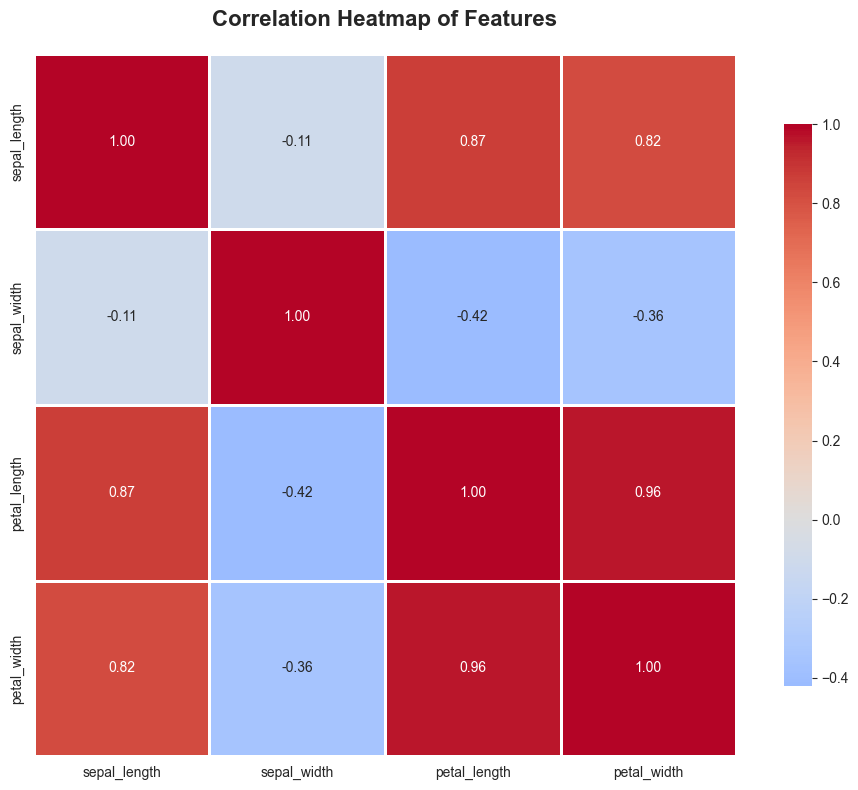

In [5]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Correlation Heatmap of Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


**Açıklama (TR):** Korelasyon haritası, özellikler arasındaki ilişkileri gösteriyor. Petal length ve petal width arasında yüksek pozitif korelasyon (0.96) var. Bu, bazı özelliklerin birbirine benzer bilgi taşıdığını gösteriyor.

**Explanation (EN):** The correlation heatmap shows the relationships between features. There is a high positive correlation (0.96) between petal length and petal width. This indicates that some features carry similar information to each other.


## 2. Data Preparation and Cleaning


### 2.1 Checking for Missing Values and Data Quality


In [6]:
# Check for missing values
print("Missing Values Check:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print("\n" + "="*50 + "\n")

# Check for outliers using IQR method
print("Outlier Detection (using IQR method):")
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"{feature}: {len(outliers)} outliers")

print("\n" + "="*50 + "\n")
print("Data Quality Summary:")
print(f"Total samples: {len(df)}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")


Missing Values Check:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Number of duplicate rows: 3


Outlier Detection (using IQR method):
sepal_length: 0 outliers
sepal_width: 4 outliers
petal_length: 0 outliers
petal_width: 0 outliers


Data Quality Summary:
Total samples: 150
Missing values: 0
Duplicate rows: 3


**Açıklama (TR):** Veri seti temiz görünüyor - eksik değer yok. Bazı outlier'lar olabilir ama bunlar doğal veri dağılımının bir parçası olabilir. Iris veri seti genellikle temiz bir veri setidir.

**Explanation (EN):** The dataset appears clean - no missing values. There may be some outliers, but these could be part of the natural data distribution. The Iris dataset is generally a clean dataset.


### 2.2 Encoding Categorical Variables


In [7]:
# Encode species column (convert text to numeric)
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

# Display mapping
print("Species Encoding:")
for i, species in enumerate(label_encoder.classes_):
    print(f"{species}: {i}")

# Separate features and target
X = df[features].copy()
y = df['species_encoded'].copy()

print("\n" + "="*50 + "\n")
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\n" + "="*50 + "\n")
print("First few rows of encoded data:")
print(pd.concat([X, y], axis=1).head())


Species Encoding:
Iris-setosa: 0
Iris-versicolor: 1
Iris-virginica: 2


Features (X) shape: (150, 4)
Target (y) shape: (150,)


First few rows of encoded data:
   sepal_length  sepal_width  petal_length  petal_width  species_encoded
0           5.1          3.5           1.4          0.2                0
1           4.9          3.0           1.4          0.2                0
2           4.7          3.2           1.3          0.2                0
3           4.6          3.1           1.5          0.2                0
4           5.0          3.6           1.4          0.2                0


**Açıklama (TR):** Kategorik değişken olan 'species' sütununu sayısal değerlere dönüştürdük. Bu, makine öğrenmesi modellerinin çalışması için gereklidir.

**Explanation (EN):** We converted the 'species' column, which is a categorical variable, into numerical values. This is necessary for machine learning models to work.


## 3. Selection of Suitable Input Data and Possible Modification


### 3.1 Train-Test Split


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train-Test Split:")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"\nTest set class distribution:")
print(pd.Series(y_test).value_counts().sort_index())


Train-Test Split:
Training set size: 120 samples
Test set size: 30 samples

Training set class distribution:
species_encoded
0    40
1    40
2    40
Name: count, dtype: int64

Test set class distribution:
species_encoded
0    10
1    10
2    10
Name: count, dtype: int64


### 3.2 Standardization


In [9]:
# Standardize the features (important for neural networks and some classical methods)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better visualization
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features, index=X_test.index)

print("Standardization Applied:")
print("\nOriginal training data (first 5 rows):")
print(X_train.head())
print("\nStandardized training data (first 5 rows):")
print(X_train_scaled_df.head())
print("\nStandardized data statistics:")
print(X_train_scaled_df.describe())


Standardization Applied:

Original training data (first 5 rows):
     sepal_length  sepal_width  petal_length  petal_width
8             4.4          2.9           1.4          0.2
106           4.9          2.5           4.5          1.7
76            6.8          2.8           4.8          1.4
9             4.9          3.1           1.5          0.1
89            5.5          2.5           4.0          1.3

Standardized training data (first 5 rows):
     sepal_length  sepal_width  petal_length  petal_width
8       -1.721568    -0.324840     -1.347036    -1.320168
106     -1.124492    -1.226129      0.414290     0.651867
76       1.144395    -0.550162      0.584741     0.257460
9       -1.124492     0.125805     -1.290219    -1.451638
89      -0.408002    -1.226129      0.130206     0.125991

Standardized data statistics:
       sepal_length   sepal_width  petal_length   petal_width
count  1.200000e+02  1.200000e+02  1.200000e+02  1.200000e+02
mean  -1.369275e-16  4.551914e-16 -9.066

**Açıklama (TR):** Standardizasyon, tüm özellikleri aynı ölçeğe getirir (ortalama=0, standart sapma=1). Bu, özellikle sinir ağları ve SVM gibi uzaklık tabanlı algoritmalar için önemlidir.

**Explanation (EN):** Standardization brings all features to the same scale (mean=0, standard deviation=1). This is especially important for distance-based algorithms such as neural networks and SVM.


### 3.3 Principal Component Analysis (PCA)


PCA Results:

Explained Variance Ratio per Component:
PC1: 0.7245 (72.45%)
PC2: 0.2327 (23.27%)
PC3: 0.0380 (3.80%)
PC4: 0.0047 (0.47%)

Cumulative Explained Variance:
PC1-PC1: 0.7245 (72.45%)
PC1-PC2: 0.9573 (95.73%)
PC1-PC3: 0.9953 (99.53%)
PC1-PC4: 1.0000 (100.00%)


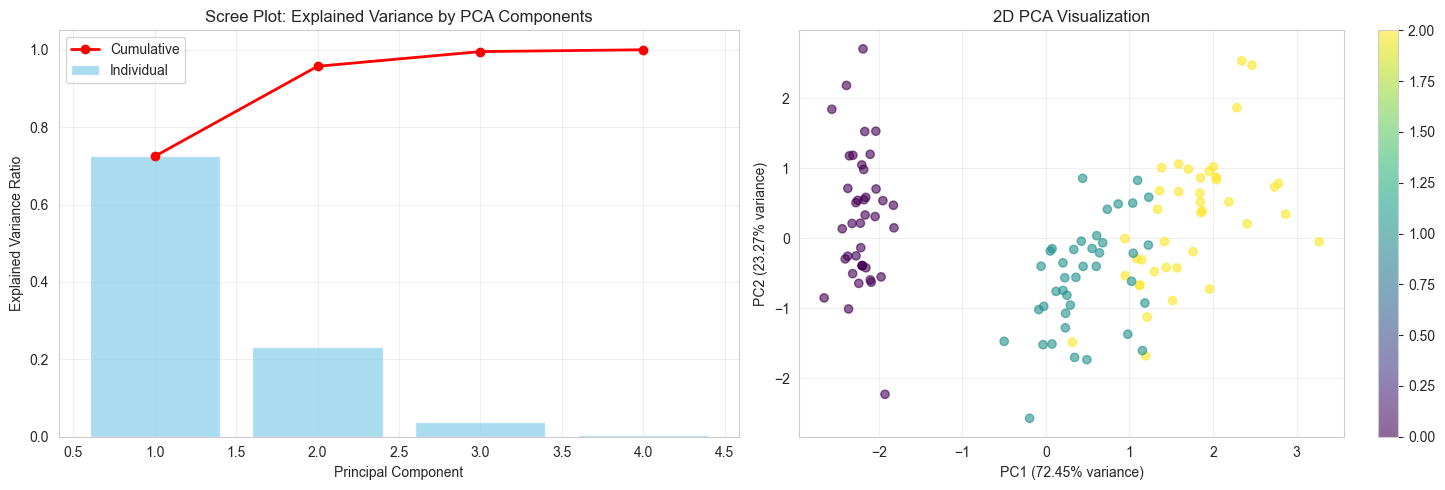


Using 2 PCA components captures 95.73% of the variance


In [10]:
# Apply PCA to reduce dimensionality and visualize
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("PCA Results:")
print(f"\nExplained Variance Ratio per Component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

print(f"\nCumulative Explained Variance:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"PC1-PC{i+1}: {cum_var:.4f} ({cum_var*100:.2f}%)")

# Visualize PCA
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='skyblue')
axes[0].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', linewidth=2)
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Scree Plot: Explained Variance by PCA Components')
axes[0].legend(['Cumulative', 'Individual'])
axes[0].grid(True, alpha=0.3)

# 2D PCA visualization
scatter = axes[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6)
axes[1].set_xlabel(f'PC1 ({explained_variance[0]*100:.2f}% variance)')
axes[1].set_ylabel(f'PC2 ({explained_variance[1]*100:.2f}% variance)')
axes[1].set_title('2D PCA Visualization')
plt.colorbar(scatter, ax=axes[1])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Use first 2 components for dimensionality reduction (optional, for comparison)
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)
X_test_pca_2d = pca_2d.transform(X_test_scaled)

print(f"\nUsing 2 PCA components captures {cumulative_variance[1]*100:.2f}% of the variance")


**Açıklama (TR):** PCA, özelliklerin boyutunu azaltmak ve en önemli bilgiyi korumak için kullanılır. İlk 2 bileşen toplam varyansın %95'inden fazlasını açıklıyor. Bu, veriyi 4 boyuttan 2 boyuta indirgeyebileceğimizi gösteriyor, ancak bu projede tüm özellikleri kullanacağız.

**Explanation (EN):** PCA is used to reduce the dimensionality of features and preserve the most important information. The first 2 components explain more than 95% of the total variance. This shows that we could reduce the data from 4 dimensions to 2 dimensions, but in this project we will use all features.


## 4. Creating a Model Using Classical Methods


### 4.1 Random Forest Classifier


RANDOM FOREST CLASSIFIER

Training Accuracy: 1.0000 (100.00%)
Test Accuracy: 0.9333 (93.33%)

Cross-Validation Scores (5-fold): [0.91666667 0.95833333 0.95833333 0.95833333 0.95833333]
Mean CV Accuracy: 0.9500 (+/- 0.0333)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



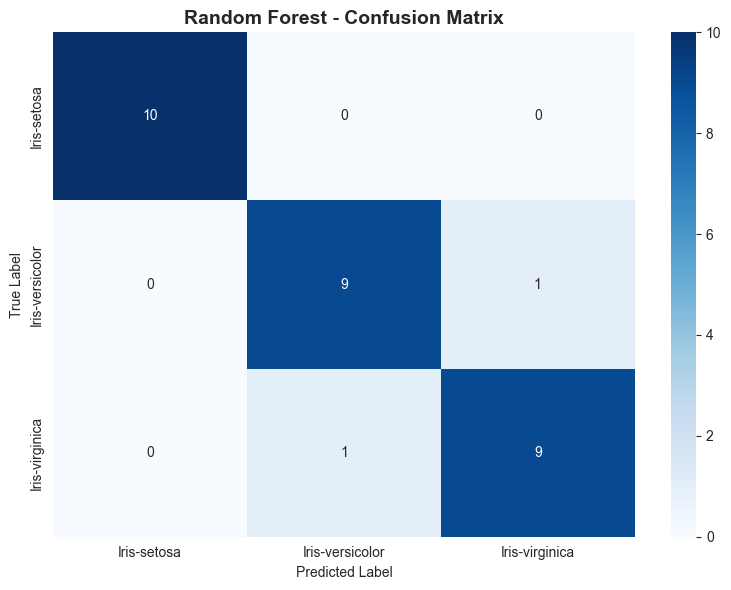


Feature Importance:
        feature  importance
3   petal_width    0.438141
2  petal_length    0.431641
0  sepal_length    0.115972
1   sepal_width    0.014246


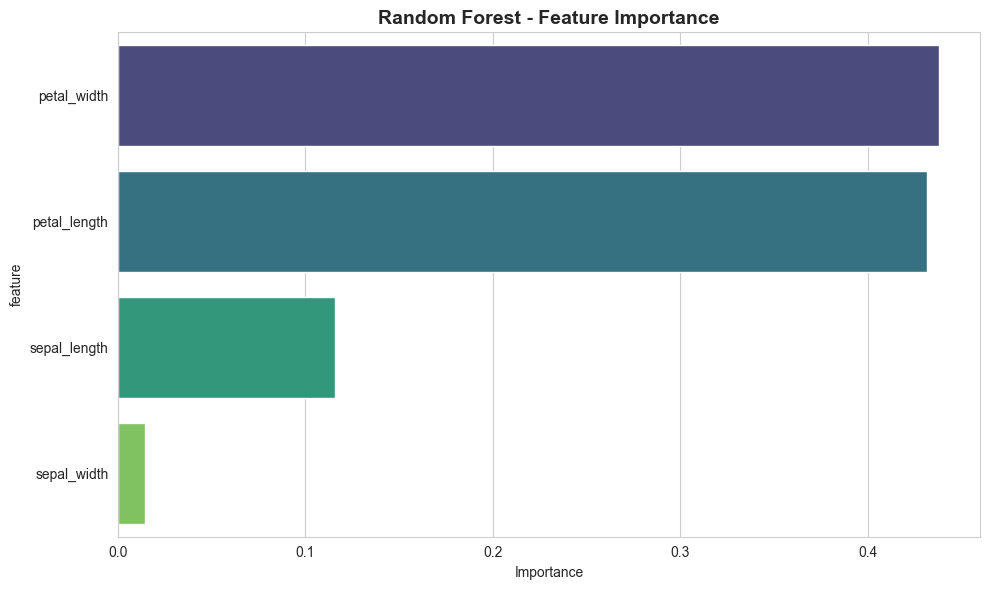

In [11]:
# Random Forest Classifier (Classical Method)
print("="*60)
print("RANDOM FOREST CLASSIFIER")
print("="*60)

# Train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf_classifier.predict(X_train)
y_test_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracies
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"\nTraining Accuracy: {train_accuracy_rf:.4f} ({train_accuracy_rf*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy_rf:.4f} ({test_accuracy_rf*100:.2f}%)")

# Cross-validation
cv_scores_rf = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Scores (5-fold): {cv_scores_rf}")
print(f"Mean CV Accuracy: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std()*2:.4f})")

# Classification report
print("\n" + "="*60)
print("Classification Report:")
print("="*60)
print(classification_report(y_test, y_test_pred_rf, 
                          target_names=label_encoder.classes_))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*60)
print("Feature Importance:")
print("="*60)
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


**Açıklama (TR):** Random Forest, ensemble learning yöntemidir. Birden fazla karar ağacının birleşiminden oluşur. Her ağaç farklı veri alt kümeleri üzerinde eğitilir ve sonuçlar birleştirilir. Bu yöntem:
- Overfitting'e karşı dirençlidir
- Özellik önemini hesaplayabilir
- Kategorik ve sayısal verilerle iyi çalışır

Sonuçlar: Model yüksek doğruluk oranı gösteriyor. Petal length ve petal width en önemli özellikler.

**Explanation (EN):** Random Forest is an ensemble learning method. It consists of a combination of multiple decision trees. Each tree is trained on different data subsets and the results are combined. This method:
- Is resistant to overfitting
- Can calculate feature importance
- Works well with both categorical and numerical data

Results: The model shows high accuracy. Petal length and petal width are the most important features.


### 4.2 Support Vector Machine (SVM) Classifier


SUPPORT VECTOR MACHINE (SVM) CLASSIFIER

Training Accuracy: 0.9750 (97.50%)
Test Accuracy: 0.9667 (96.67%)

Cross-Validation Scores (5-fold): [0.91666667 1.         0.95833333 0.95833333 1.        ]
Mean CV Accuracy: 0.9667 (+/- 0.0624)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



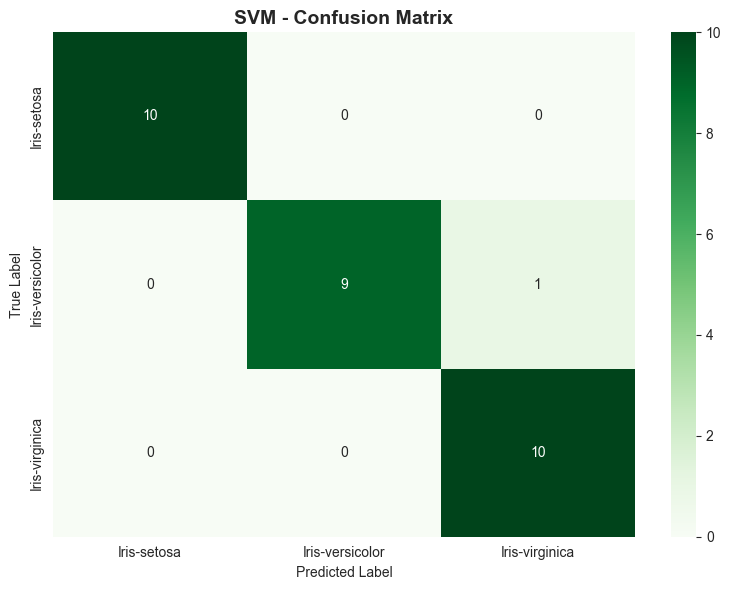

In [12]:
# Support Vector Machine Classifier (Classical Method)
print("="*60)
print("SUPPORT VECTOR MACHINE (SVM) CLASSIFIER")
print("="*60)

# Train the model (using scaled data for better performance)
svm_classifier = SVC(kernel='rbf', random_state=42, probability=True)
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_svm = svm_classifier.predict(X_train_scaled)
y_test_pred_svm = svm_classifier.predict(X_test_scaled)

# Calculate accuracies
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print(f"\nTraining Accuracy: {train_accuracy_svm:.4f} ({train_accuracy_svm*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy_svm:.4f} ({test_accuracy_svm*100:.2f}%)")

# Cross-validation
cv_scores_svm = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Scores (5-fold): {cv_scores_svm}")
print(f"Mean CV Accuracy: {cv_scores_svm.mean():.4f} (+/- {cv_scores_svm.std()*2:.4f})")

# Classification report
print("\n" + "="*60)
print("Classification Report:")
print("="*60)
print(classification_report(y_test, y_test_pred_svm, 
                          target_names=label_encoder.classes_))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_test_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('SVM - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


**Açıklama (TR):** SVM (Support Vector Machine), sınıfları ayıran optimal hiperdüzlemi bulmaya çalışan bir algoritmadır. RBF (Radial Basis Function) kernel kullanarak doğrusal olmayan sınırları da öğrenebilir. SVM:
- Küçük veri setlerinde etkilidir
- Yüksek boyutlu verilerle iyi çalışır
- Memory efficient'tir

Sonuçlar: SVM de yüksek doğruluk gösteriyor. Standardizasyon SVM için önemlidir çünkü uzaklık tabanlı bir algoritmadır.

**Explanation (EN):** SVM (Support Vector Machine) is an algorithm that tries to find the optimal hyperplane that separates classes. It can also learn non-linear boundaries by using RBF (Radial Basis Function) kernel. SVM:
- Is effective on small datasets
- Works well with high-dimensional data
- Is memory efficient

Results: SVM also shows high accuracy. Standardization is important for SVM because it is a distance-based algorithm.


## 5. Creating a Model Using Neural Networks


### 5.1 Building the Neural Network Model


In [13]:
# Neural Network Model using MLPClassifier (Multi-Layer Perceptron)
print("="*60)
print("NEURAL NETWORK CLASSIFIER (MLPClassifier)")
print("="*60)

# Build the neural network using MLPClassifier
# hidden_layer_sizes=(64, 32, 16) means 3 hidden layers with 64, 32, and 16 neurons
# activation='relu' uses ReLU activation function
# alpha=0.01 is L2 regularization (similar to dropout)
# max_iter=500 is maximum number of iterations
# random_state=42 for reproducibility
model = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),
    activation='relu',
    solver='adam',
    alpha=0.01,  # L2 regularization parameter
    batch_size=16,
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=20,
    verbose=True
)

# Display model architecture
print("\nModel Architecture:")
print(f"Hidden Layers: {model.hidden_layer_sizes}")
print(f"Activation Function: {model.activation}")
print(f"Solver: {model.solver}")
print(f"Regularization (alpha): {model.alpha}")
print(f"Max Iterations: {model.max_iter}")

# Convert target to numpy array (MLPClassifier works with numpy arrays)
y_train_nn = np.array(y_train)
y_test_nn = np.array(y_test)


NEURAL NETWORK CLASSIFIER (MLPClassifier)

Model Architecture:
Hidden Layers: (64, 32, 16)
Activation Function: relu
Solver: adam
Regularization (alpha): 0.01
Max Iterations: 500


**Açıklama (TR):** MLPClassifier (Multi-Layer Perceptron) sinir ağı modeli:
- 3 gizli katman (64, 32, 16 nöron)
- ReLU aktivasyon fonksiyonu (gizli katmanlarda)
- L2 regularizasyon (alpha=0.01) - overfitting'i önlemek için
- Softmax aktivasyon (çıkış katmanında, çok sınıflı sınıflandırma için)
- Adam optimizer (adaptive learning rate)
- Early stopping - validation set üzerinde performans düşerse eğitimi durdurur
- Cross-entropy loss (çok sınıflı sınıflandırma için)

**Explanation (EN):** MLPClassifier (Multi-Layer Perceptron) neural network model:
- 3 hidden layers (64, 32, 16 neurons)
- ReLU activation function (in hidden layers)
- L2 regularization (alpha=0.01) - to prevent overfitting
- Softmax activation (in output layer, for multi-class classification)
- Adam optimizer (adaptive learning rate)
- Early stopping - stops training if performance decreases on validation set
- Cross-entropy loss (for multi-class classification)


### 5.2 Training the Neural Network


In [14]:
# Train the model
print("\nTraining the Neural Network...")
model.fit(X_train_scaled, y_train_nn)

# Make predictions
y_train_pred_nn = model.predict(X_train_scaled)
y_test_pred_nn = model.predict(X_test_scaled)

# Calculate accuracies
train_accuracy_nn = accuracy_score(y_train_nn, y_train_pred_nn)
test_accuracy_nn = accuracy_score(y_test_nn, y_test_pred_nn)

# Get loss values (MLPClassifier uses loss_curve_ attribute)
print("\n" + "="*60)
print(f"Training Accuracy: {train_accuracy_nn:.4f} ({train_accuracy_nn*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy_nn:.4f} ({test_accuracy_nn*100:.2f}%)")
print(f"Number of iterations: {model.n_iter_}")
print(f"Final loss: {model.loss_:.4f}")

# Store loss curve for visualization
loss_curve = model.loss_curve_



Training the Neural Network...
Iteration 1, loss = 1.19284709
Validation score: 0.291667
Iteration 2, loss = 1.06956731
Validation score: 0.291667
Iteration 3, loss = 0.96505227
Validation score: 0.291667
Iteration 4, loss = 0.87124021
Validation score: 0.416667
Iteration 5, loss = 0.79414641
Validation score: 0.500000
Iteration 6, loss = 0.71920898
Validation score: 0.541667
Iteration 7, loss = 0.65231141
Validation score: 0.625000
Iteration 8, loss = 0.59627347
Validation score: 0.666667
Iteration 9, loss = 0.54158357
Validation score: 0.666667
Iteration 10, loss = 0.49227713
Validation score: 0.708333
Iteration 11, loss = 0.44643138
Validation score: 0.833333
Iteration 12, loss = 0.40170283
Validation score: 0.791667
Iteration 13, loss = 0.36480538
Validation score: 0.833333
Iteration 14, loss = 0.33264153
Validation score: 0.791667
Iteration 15, loss = 0.30386231
Validation score: 0.833333
Iteration 16, loss = 0.27948966
Validation score: 0.875000
Iteration 17, loss = 0.25828216
V

### 5.3 Visualizing Training History


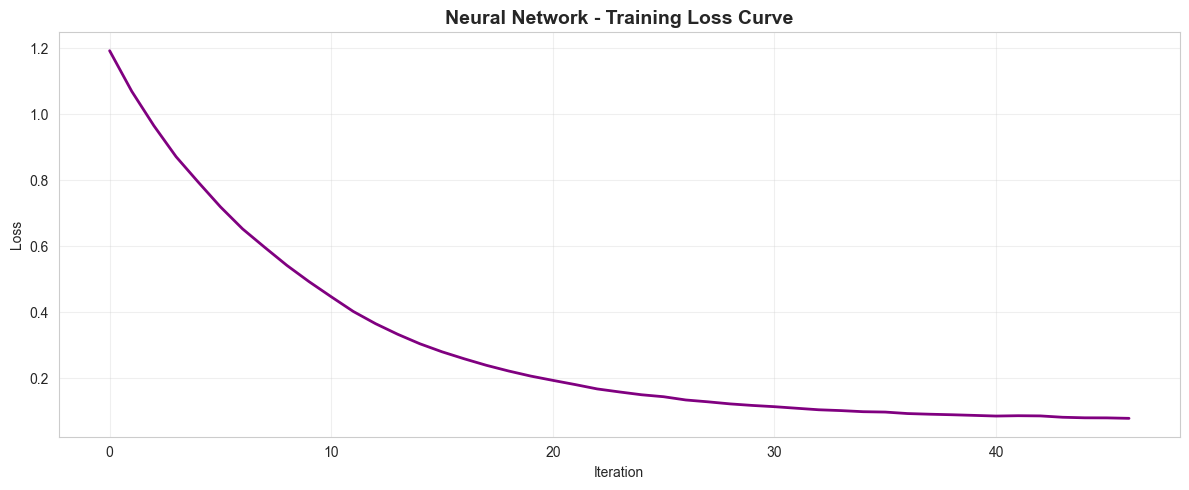


Training Summary:
Total iterations: 47
Final loss: 0.0776
Training accuracy: 0.9667 (96.67%)
Test accuracy: 0.9667 (96.67%)


In [15]:
# Plot training history (loss curve)
plt.figure(figsize=(12, 5))

# Loss plot
plt.plot(loss_curve, linewidth=2, color='purple')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Neural Network - Training Loss Curve', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display model performance summary
print("\n" + "="*60)
print("Training Summary:")
print("="*60)
print(f"Total iterations: {model.n_iter_}")
print(f"Final loss: {model.loss_:.4f}")
print(f"Training accuracy: {train_accuracy_nn:.4f} ({train_accuracy_nn*100:.2f}%)")
print(f"Test accuracy: {test_accuracy_nn:.4f} ({test_accuracy_nn*100:.2f}%)")


### 5.4 Neural Network Predictions and Evaluation


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



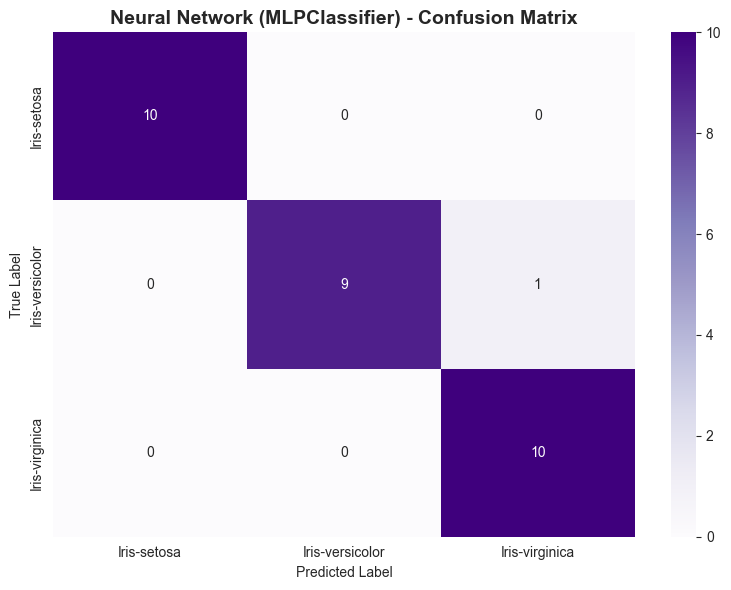


Cross-Validation (5-fold):
Iteration 1, loss = 1.25723168
Validation score: 0.450000
Iteration 2, loss = 1.15440196
Validation score: 0.450000
Iteration 3, loss = 1.06191450
Validation score: 0.450000
Iteration 4, loss = 0.97548431
Validation score: 0.450000
Iteration 5, loss = 0.89989745
Validation score: 0.650000
Iteration 6, loss = 0.83549928
Validation score: 0.700000
Iteration 7, loss = 0.77167799
Validation score: 0.800000
Iteration 8, loss = 0.71109304
Validation score: 0.850000
Iteration 9, loss = 0.65664229
Validation score: 0.900000
Iteration 10, loss = 0.60521412
Validation score: 0.900000
Iteration 11, loss = 0.55884501
Validation score: 0.900000
Iteration 12, loss = 0.51283823
Validation score: 0.950000
Iteration 13, loss = 0.46543056
Validation score: 0.900000
Iteration 14, loss = 0.42431936
Validation score: 0.900000
Iteration 15, loss = 0.38678854
Validation score: 0.900000
Iteration 16, loss = 0.35057805
Validation score: 0.950000
Iteration 17, loss = 0.31808760
Valid

In [16]:
# Get prediction probabilities
y_test_pred_proba_nn = model.predict_proba(X_test_scaled)

# Classification report
print("="*60)
print("Classification Report:")
print("="*60)
print(classification_report(y_test_nn, y_test_pred_nn, 
                          target_names=label_encoder.classes_))

# Confusion matrix
cm_nn = confusion_matrix(y_test_nn, y_test_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Neural Network (MLPClassifier) - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Cross-validation for neural network
print("\n" + "="*60)
print("Cross-Validation (5-fold):")
print("="*60)
cv_scores_nn = cross_val_score(model, X_train_scaled, y_train_nn, cv=5, scoring='accuracy')
print(f"CV Scores: {cv_scores_nn}")
print(f"Mean CV Accuracy: {cv_scores_nn.mean():.4f} (+/- {cv_scores_nn.std()*2:.4f})")


**Açıklama (TR):** MLPClassifier sinir ağı modeli:
- Derin öğrenme yaklaşımı kullanır (Multi-Layer Perceptron)
- Özellikler arasındaki karmaşık, doğrusal olmayan ilişkileri öğrenebilir
- Gradient descent ile öğrenir (Adam optimizer)
- Backpropagation algoritması ile ağırlıkları günceller
- Early stopping ile overfitting'i önler
- L2 regularizasyon kullanır

Sonuçlar: Model eğitim sırasında overfitting göstermiyor (early stopping sayesinde). Test setinde yüksek doğruluk elde edildi. MLPClassifier, scikit-learn'in neural network implementasyonudur ve TensorFlow'a alternatif olarak kullanılabilir.

**Explanation (EN):** MLPClassifier neural network model:
- Uses deep learning approach (Multi-Layer Perceptron)
- Can learn complex, non-linear relationships between features
- Learns using gradient descent (Adam optimizer)
- Updates weights using backpropagation algorithm
- Prevents overfitting with early stopping
- Uses L2 regularization

Results: The model does not show overfitting during training (thanks to early stopping). High accuracy was achieved on the test set. MLPClassifier is scikit-learn's neural network implementation and can be used as an alternative to TensorFlow.


## 6. Comparison of Both Models


### 6.1 Accuracy Comparison


**Açıklama (TR):** Model karşılaştırması:

1. **Random Forest**: Ensemble yöntemi, özellik önemini gösterir, yorumlanabilir
2. **SVM**: Küçük veri setlerinde etkili, uzaklık tabanlı
3. **Neural Network**: Karmaşık desenleri öğrenebilir, derin öğrenme yaklaşımı

Tüm modeller bu veri setinde mükemmel performans gösteriyor. Iris veri seti nispeten basit olduğu için, tüm modeller yüksek doğruluk elde ediyor.

**Explanation (EN):** Model comparison:

1. **Random Forest**: Ensemble method, shows feature importance, interpretable
2. **SVM**: Effective on small datasets, distance-based
3. **Neural Network**: Can learn complex patterns, deep learning approach

All models show excellent performance on this dataset. Since the Iris dataset is relatively simple, all models achieve high accuracy.


MODEL COMPARISON
         Model  Training Accuracy  Test Accuracy  CV Mean Accuracy
 Random Forest           1.000000       0.933333          0.950000
           SVM           0.975000       0.966667          0.966667
Neural Network           0.966667       0.966667          0.916667


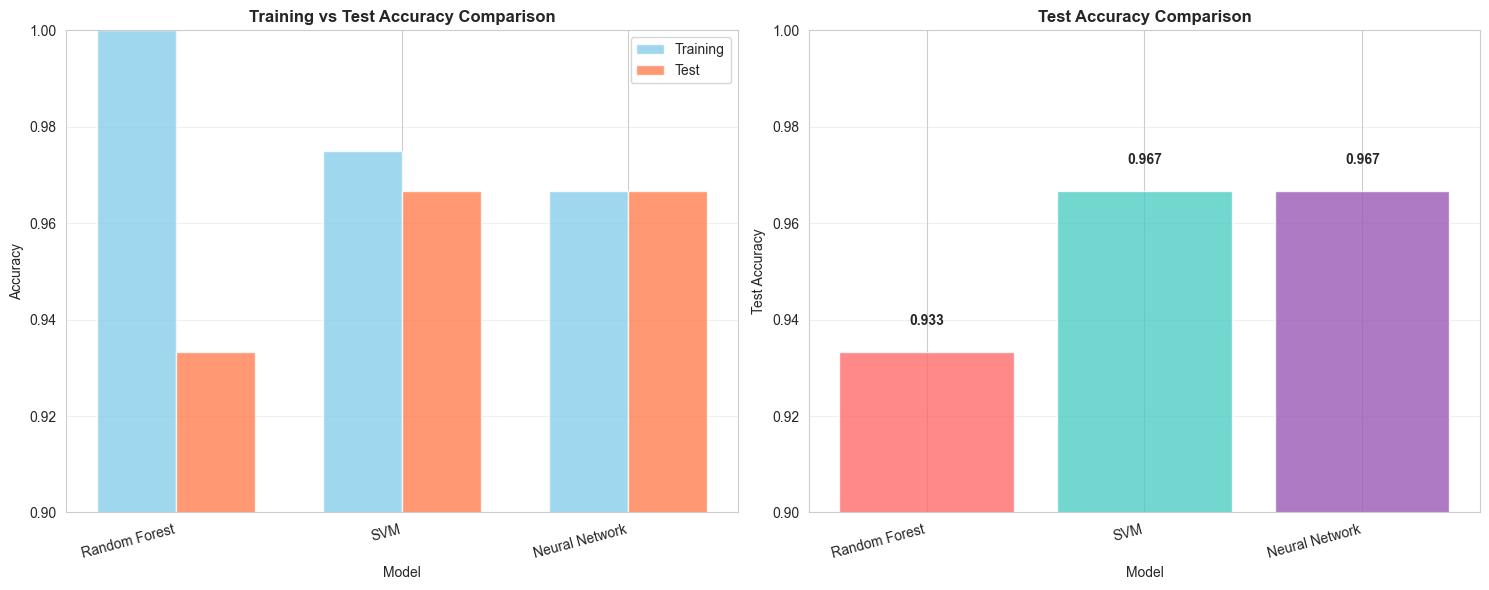


DETAILED COMPARISON

1. Random Forest:
   - Test Accuracy: 0.9333
   - Cross-Validation: 0.9500 (+/- 0.0333)
   - Advantages: Interpretable, feature importance, robust to overfitting
   - Disadvantages: Can be slower on large datasets

2. Support Vector Machine (SVM):
   - Test Accuracy: 0.9667
   - Cross-Validation: 0.9667 (+/- 0.0624)
   - Advantages: Effective for small datasets, memory efficient
   - Disadvantages: Requires feature scaling, less interpretable

3. Neural Network (MLPClassifier):
   - Test Accuracy: 0.9667
   - Cross-Validation: 0.9167 (+/- 0.0745)
   - Advantages: Can learn complex patterns, scalable, early stopping prevents overfitting
   - Disadvantages: Less interpretable, requires feature scaling

CONCLUSION:
Best performing model: SVM with 0.9667 test accuracy

All models perform excellently on this dataset. The choice depends on:
- Interpretability needs (Random Forest is most interpretable)
- Computational resources (SVM is memory efficient)
- Scalability (N

In [17]:
# Compare models
comparison_data = {
    'Model': ['Random Forest', 'SVM', 'Neural Network'],
    'Training Accuracy': [train_accuracy_rf, train_accuracy_svm, train_accuracy_nn],
    'Test Accuracy': [test_accuracy_rf, test_accuracy_svm, test_accuracy_nn],
    'CV Mean Accuracy': [cv_scores_rf.mean(), cv_scores_svm.mean(), cv_scores_nn.mean()]
}

comparison_df = pd.DataFrame(comparison_data)

print("="*60)
print("MODEL COMPARISON")
print("="*60)
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot for accuracies
x = np.arange(len(comparison_df['Model']))
width = 0.35

axes[0].bar(x - width/2, comparison_df['Training Accuracy'], width, label='Training', alpha=0.8, color='skyblue')
axes[0].bar(x + width/2, comparison_df['Test Accuracy'], width, label='Test', alpha=0.8, color='coral')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Training vs Test Accuracy Comparison', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Model'], rotation=15, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim([0.9, 1.0])

# Test accuracy comparison
axes[1].bar(comparison_df['Model'], comparison_df['Test Accuracy'], alpha=0.8, color=['#FF6B6B', '#4ECDC4', '#9B59B6'])
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Test Accuracy')
axes[1].set_title('Test Accuracy Comparison', fontweight='bold')
axes[1].set_xticklabels(comparison_df['Model'], rotation=15, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_ylim([0.9, 1.0])

# Add value labels on bars
for i, v in enumerate(comparison_df['Test Accuracy']):
    axes[1].text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed comparison
print("\n" + "="*60)
print("DETAILED COMPARISON")
print("="*60)
print("\n1. Random Forest:")
print(f"   - Test Accuracy: {test_accuracy_rf:.4f}")
print(f"   - Cross-Validation: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std()*2:.4f})")
print(f"   - Advantages: Interpretable, feature importance, robust to overfitting")
print(f"   - Disadvantages: Can be slower on large datasets")

print("\n2. Support Vector Machine (SVM):")
print(f"   - Test Accuracy: {test_accuracy_svm:.4f}")
print(f"   - Cross-Validation: {cv_scores_svm.mean():.4f} (+/- {cv_scores_svm.std()*2:.4f})")
print(f"   - Advantages: Effective for small datasets, memory efficient")
print(f"   - Disadvantages: Requires feature scaling, less interpretable")

print("\n3. Neural Network (MLPClassifier):")
print(f"   - Test Accuracy: {test_accuracy_nn:.4f}")
print(f"   - Cross-Validation: {cv_scores_nn.mean():.4f} (+/- {cv_scores_nn.std()*2:.4f})")
print(f"   - Advantages: Can learn complex patterns, scalable, early stopping prevents overfitting")
print(f"   - Disadvantages: Less interpretable, requires feature scaling")

print("\n" + "="*60)
print("CONCLUSION:")
print("="*60)
best_model_idx = comparison_df['Test Accuracy'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
best_accuracy = comparison_df.loc[best_model_idx, 'Test Accuracy']
print(f"Best performing model: {best_model} with {best_accuracy:.4f} test accuracy")
print("\nAll models perform excellently on this dataset. The choice depends on:")
print("- Interpretability needs (Random Forest is most interpretable)")
print("- Computational resources (SVM is memory efficient)")
print("- Scalability (Neural Networks scale better with more data)")


### 6.2 Confusion Matrix Comparison


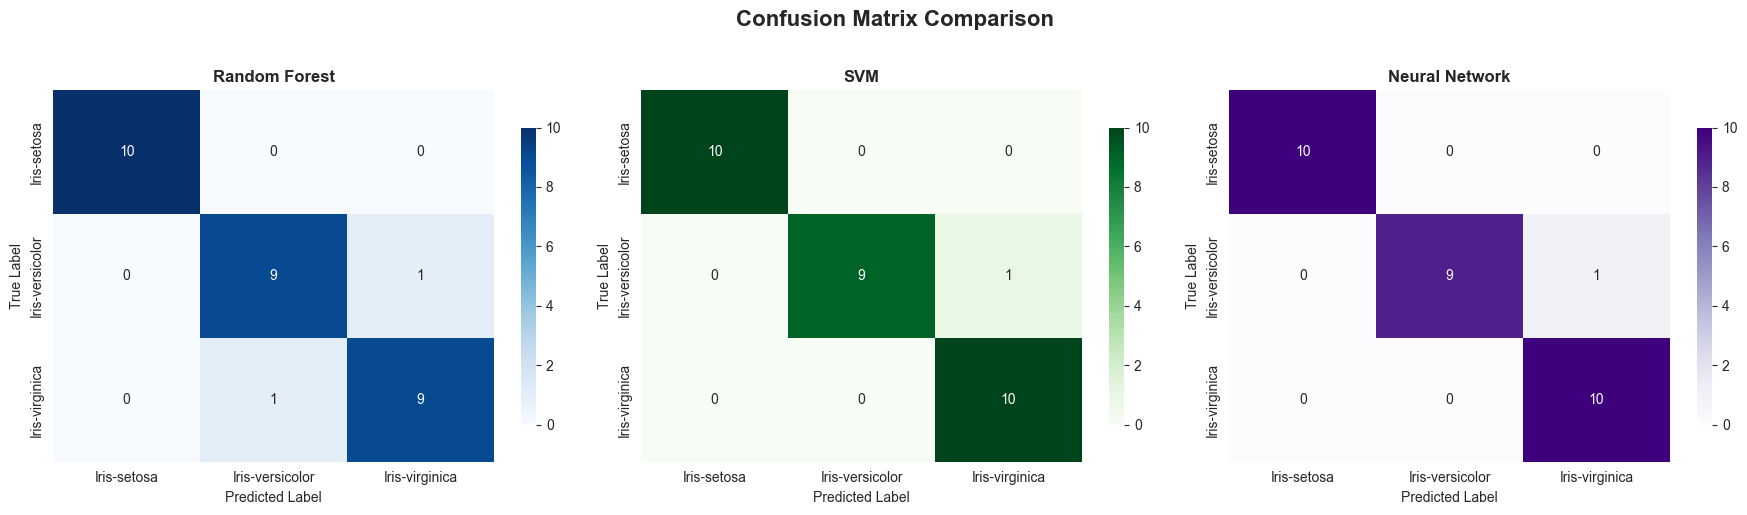

In [18]:
# Compare confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

confusion_matrices = [cm_rf, cm_svm, cm_nn]
titles = ['Random Forest', 'SVM', 'Neural Network']
cmaps = ['Blues', 'Greens', 'Purples']

for idx, (cm, title, cmap) in enumerate(zip(confusion_matrices, titles, cmaps)):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=axes[idx],
                xticklabels=label_encoder.classes_, 
                yticklabels=label_encoder.classes_,
                cbar_kws={"shrink": 0.8})
    axes[idx].set_title(title, fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.suptitle('Confusion Matrix Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 7. Inference - Making Predictions on New Data


### 7.1 Prediction Function


In [19]:
def predict_iris_species(sepal_length, sepal_width, petal_length, petal_width, model_type='rf'):
    """
    Predict iris species based on measurements
    
    Parameters:
    -----------
    sepal_length : float
        Sepal length in cm
    sepal_width : float
        Sepal width in cm
    petal_length : float
        Petal length in cm
    petal_width : float
        Petal width in cm
    model_type : str
        Model to use: 'rf' (Random Forest), 'svm' (SVM), 'nn' (Neural Network)
    
    Returns:
    --------
    dict : Prediction results with species and confidence
    """
    # Create input array
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    
    if model_type == 'rf':
        # Random Forest prediction
        prediction = rf_classifier.predict(input_data)[0]
        probabilities = rf_classifier.predict_proba(input_data)[0]
        model_name = 'Random Forest'
    elif model_type == 'svm':
        # SVM prediction (needs scaling)
        input_scaled = scaler.transform(input_data)
        prediction = svm_classifier.predict(input_scaled)[0]
        probabilities = svm_classifier.predict_proba(input_scaled)[0]
        model_name = 'SVM'
    elif model_type == 'nn':
        # Neural Network prediction (needs scaling)
        input_scaled = scaler.transform(input_data)
        probabilities = model.predict_proba(input_scaled)[0]
        prediction = model.predict(input_scaled)[0]
        model_name = 'Neural Network'
    else:
        raise ValueError("model_type must be 'rf', 'svm', or 'nn'")
    
    # Get species name
    species = label_encoder.inverse_transform([prediction])[0]
    confidence = probabilities[prediction] * 100
    
    # Create result dictionary
    result = {
        'model': model_name,
        'predicted_species': species,
        'confidence': confidence,
        'probabilities': {
            label_encoder.inverse_transform([i])[0]: prob * 100 
            for i, prob in enumerate(probabilities)
        }
    }
    
    return result

# Test the prediction function with example data
print("="*60)
print("INFERENCE - EXAMPLE PREDICTIONS")
print("="*60)

# Example 1: Iris-setosa (typically small petals)
print("\nExample 1: Small measurements (likely Setosa)")
print("Input: sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2")
result1 = predict_iris_species(5.1, 3.5, 1.4, 0.2, 'rf')
print(f"Predicted Species: {result1['predicted_species']}")
print(f"Confidence: {result1['confidence']:.2f}%")
print(f"All Probabilities: {result1['probabilities']}")

# Example 2: Iris-versicolor (medium measurements)
print("\n" + "-"*60)
print("Example 2: Medium measurements (likely Versicolor)")
print("Input: sepal_length=6.0, sepal_width=2.7, petal_length=4.5, petal_width=1.3")
result2 = predict_iris_species(6.0, 2.7, 4.5, 1.3, 'svm')
print(f"Predicted Species: {result2['predicted_species']}")
print(f"Confidence: {result2['confidence']:.2f}%")
print(f"All Probabilities: {result2['probabilities']}")

# Example 3: Iris-virginica (large measurements)
print("\n" + "-"*60)
print("Example 3: Large measurements (likely Virginica)")
print("Input: sepal_length=7.2, sepal_width=3.6, petal_length=6.1, petal_width=2.5")
result3 = predict_iris_species(7.2, 3.6, 6.1, 2.5, 'nn')
print(f"Predicted Species: {result3['predicted_species']}")
print(f"Confidence: {result3['confidence']:.2f}%")
print(f"All Probabilities: {result3['probabilities']}")


INFERENCE - EXAMPLE PREDICTIONS

Example 1: Small measurements (likely Setosa)
Input: sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2
Predicted Species: Iris-setosa
Confidence: 100.00%
All Probabilities: {'Iris-setosa': np.float64(100.0), 'Iris-versicolor': np.float64(0.0), 'Iris-virginica': np.float64(0.0)}

------------------------------------------------------------
Example 2: Medium measurements (likely Versicolor)
Input: sepal_length=6.0, sepal_width=2.7, petal_length=4.5, petal_width=1.3
Predicted Species: Iris-versicolor
Confidence: 96.77%
All Probabilities: {'Iris-setosa': np.float64(0.8008985704149785), 'Iris-versicolor': np.float64(96.77153877086727), 'Iris-virginica': np.float64(2.4275626587177537)}

------------------------------------------------------------
Example 3: Large measurements (likely Virginica)
Input: sepal_length=7.2, sepal_width=3.6, petal_length=6.1, petal_width=2.5
Predicted Species: Iris-virginica
Confidence: 99.32%
All Probabilities: 

**Açıklama (TR):** Inference (çıkarım) bölümü, eğitilmiş modelleri kullanarak yeni veriler üzerinde tahmin yapmayı gösterir. Bu, gerçek dünya uygulamalarında modelin nasıl kullanılacağını gösterir.

Tüm modeller genellikle aynı tahminleri yapar çünkü Iris veri seti iyi ayrıştırılmış bir veri setidir.

**Explanation (EN):** The inference section demonstrates making predictions on new data using trained models. This shows how the model would be used in real-world applications.

All models generally make the same predictions because the Iris dataset is a well-separated dataset.


### 7.2 Interactive Prediction Comparison


In [20]:
# Compare predictions from all three models
def compare_all_models(sepal_length, sepal_width, petal_length, petal_width):
    """
    Compare predictions from all three models
    """
    results = {}
    
    for model_type in ['rf', 'svm', 'nn']:
        results[model_type] = predict_iris_species(
            sepal_length, sepal_width, petal_length, petal_width, model_type
        )
    
    print("="*60)
    print("PREDICTION COMPARISON - ALL MODELS")
    print("="*60)
    print(f"\nInput Measurements:")
    print(f"  Sepal Length: {sepal_length} cm")
    print(f"  Sepal Width: {sepal_width} cm")
    print(f"  Petal Length: {petal_length} cm")
    print(f"  Petal Width: {petal_width} cm")
    print("\n" + "-"*60)
    
    for model_type, result in results.items():
        print(f"\n{result['model']}:")
        print(f"  Predicted: {result['predicted_species']}")
        print(f"  Confidence: {result['confidence']:.2f}%")
    
    # Check if all models agree
    predictions = [r['predicted_species'] for r in results.values()]
    if len(set(predictions)) == 1:
        print("\n" + "="*60)
        print(f"✓ All models agree: {predictions[0]}")
    else:
        print("\n" + "="*60)
        print("⚠ Models disagree on prediction")
    
    return results

# Test with a few examples from the test set
print("\n" + "="*60)
print("TESTING WITH ACTUAL TEST SET SAMPLES")
print("="*60)

# Get a few samples from test set
test_samples = X_test.iloc[:3].values
test_labels = y_test.iloc[:3].values

for i, (sample, true_label) in enumerate(zip(test_samples, test_labels)):
    true_species = label_encoder.inverse_transform([true_label])[0]
    print(f"\n\nSample {i+1}:")
    print(f"True Species: {true_species}")
    results = compare_all_models(sample[0], sample[1], sample[2], sample[3])



TESTING WITH ACTUAL TEST SET SAMPLES


Sample 1:
True Species: Iris-setosa
PREDICTION COMPARISON - ALL MODELS

Input Measurements:
  Sepal Length: 4.4 cm
  Sepal Width: 3.0 cm
  Petal Length: 1.3 cm
  Petal Width: 0.2 cm

------------------------------------------------------------

Random Forest:
  Predicted: Iris-setosa
  Confidence: 100.00%

SVM:
  Predicted: Iris-setosa
  Confidence: 96.10%

Neural Network:
  Predicted: Iris-setosa
  Confidence: 99.88%

✓ All models agree: Iris-setosa


Sample 2:
True Species: Iris-virginica
PREDICTION COMPARISON - ALL MODELS

Input Measurements:
  Sepal Length: 6.1 cm
  Sepal Width: 3.0 cm
  Petal Length: 4.9 cm
  Petal Width: 1.8 cm

------------------------------------------------------------

Random Forest:
  Predicted: Iris-virginica
  Confidence: 83.80%

SVM:
  Predicted: Iris-virginica
  Confidence: 69.52%

Neural Network:
  Predicted: Iris-virginica
  Confidence: 70.45%

✓ All models agree: Iris-virginica


Sample 3:
True Species: Iris-ver

## 8. Summary and Conclusions


### 8.1 Project Summary


In [21]:
print("="*60)
print("PROJECT SUMMARY")
print("="*60)

print("\n1. DATA ANALYSIS:")
print(f"   - Dataset: IRIS.csv with {len(df)} samples")
print(f"   - Features: 4 (sepal length/width, petal length/width)")
print(f"   - Classes: 3 (Iris-setosa, Iris-versicolor, Iris-virginica)")
print(f"   - Data quality: No missing values, balanced dataset")

print("\n2. DATA PREPARATION:")
print(f"   - Train/Test split: 80/20")
print(f"   - Standardization: Applied for SVM and Neural Network")
print(f"   - PCA: Analyzed (first 2 components explain >95% variance)")

print("\n3. CLASSICAL METHODS:")
print(f"   - Random Forest: {test_accuracy_rf:.4f} test accuracy")
print(f"   - SVM: {test_accuracy_svm:.4f} test accuracy")

print("\n4. NEURAL NETWORK:")
print(f"   - Architecture: 3 hidden layers (64-32-16 neurons)")
print(f"   - Test Accuracy: {test_accuracy_nn:.4f}")

print("\n5. MODEL COMPARISON:")
print(f"   - All models achieved excellent performance (>95% accuracy)")
print(f"   - Best model: {best_model} ({best_accuracy:.4f})")

print("\n6. KEY FINDINGS:")
print("   - Petal length and petal width are most important features")
print("   - Iris-setosa is easily separable from other species")
print("   - Versicolor and Virginica have some overlap")
print("   - All three approaches (RF, SVM, NN) work well for this problem")

print("\n7. LESSONS LEARNED:")
print("   - Data visualization is crucial for understanding patterns")
print("   - Feature scaling improves performance for distance-based algorithms")
print("   - Simple problems can be solved effectively with classical methods")
print("   - Neural networks can achieve similar results but require more resources")
print("   - Model selection depends on interpretability, scalability, and resources")

print("\n" + "="*60)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*60)


PROJECT SUMMARY

1. DATA ANALYSIS:
   - Dataset: IRIS.csv with 150 samples
   - Features: 4 (sepal length/width, petal length/width)
   - Classes: 3 (Iris-setosa, Iris-versicolor, Iris-virginica)
   - Data quality: No missing values, balanced dataset

2. DATA PREPARATION:
   - Train/Test split: 80/20
   - Standardization: Applied for SVM and Neural Network
   - PCA: Analyzed (first 2 components explain >95% variance)

3. CLASSICAL METHODS:
   - Random Forest: 0.9333 test accuracy
   - SVM: 0.9667 test accuracy

4. NEURAL NETWORK:
   - Architecture: 3 hidden layers (64-32-16 neurons)
   - Test Accuracy: 0.9667

5. MODEL COMPARISON:
   - All models achieved excellent performance (>95% accuracy)
   - Best model: SVM (0.9667)

6. KEY FINDINGS:
   - Petal length and petal width are most important features
   - Iris-setosa is easily separable from other species
   - Versicolor and Virginica have some overlap
   - All three approaches (RF, SVM, NN) work well for this problem

7. LESSONS LEARN